In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNearestNeighbour/Diabetes_XTrain.csv").values
y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNearestNeighbour/Diabetes_YTrain.csv").values
x_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNearestNeighbour/Test Cases/Diabetes_Xtest.csv").values

In [3]:
classes,counts = np.unique(y_train,return_counts=True)

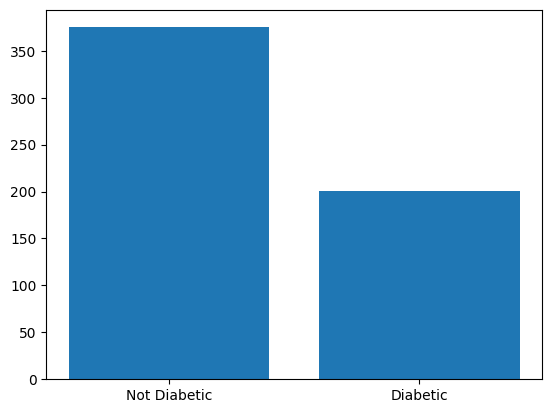

In [4]:
plt.bar(classes,counts)
plt.xticks([0,1],['Not Diabetic','Diabetic'])
plt.show()

In [ ]:
import numpy as np

class KNNClassifier:
  def __init__(self, k=5):
    self.k = k

  def fit(self, x, y):
    self.x = x
    self.y = y

  def distance_formula(self, p1, p2):
    return np.linalg.norm(p1 - p2)  # Works for any number of features

  def predict(self, p):
    distances = []
    for i in range(len(self.x)):
      distances.append((self.distance_formula(self.x[i], p), i))

    distances = sorted(distances, key=lambda x: x[0])
    points_with_distances = distances[:self.k]

    classes = [self.y[i] for dist, i in points_with_distances]
    class_, counts = np.unique(classes, return_counts=True)
    ix = np.argmax(counts)

    pred = {
        "class": float(class_[ix]),
        "prob": float(max(counts) / np.sum(counts))
    }
    return pred


In [ ]:
knn_model = KNNClassifier()

In [ ]:
knn_model.fit(x_train,y_train)

In [ ]:
predictions = []

for i in range(len(x_test)):
  predictions.append(knn_model.predict(x_test[i])["class"])

In [ ]:
predictions = pd.Series(['Outcome']+predictions)

In [ ]:
predictions.to_csv("/content/drive/MyDrive/dataset/Test Cases/Diabetes_Ytest.csv",header=None,index = False)

In [ ]:
predictions

,0
0,outcome
1,1.0
2,0.0
3,0.0
4,0.0
...,...
188,1.0
189,0.0
190,1.0
191,1.0
